<a href="https://colab.research.google.com/github/edwin-yan/Passion-Fruit-Disease-Detection/blob/andrew/Image_Augmentation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation

Using this library to do image augmentation
https://towardsdatascience.com/tensorflow-and-image-augmentation-3610c6c243a2

# SET UP
## Mounting

Note that this assumes that your google drive folder has the same document layout. You must modify if that is not the case.


From your root Google Drive directory create a couple of folders:
* `JHU/DNN/FinalProject/Train_Images`
* `JHU/DNN/FinalProject/Test_Images` 

with Train and test images unzipped in those directories



# **TODO:** GLOBAL VARIABLE set to `True` if using colab and `False` if not!

In [70]:
IS_COLAB = True 

# **TODO:** CHANGE `IMG_DIR` if your google drive directory is different

In [71]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  IMG_PATH = '/content/drive/MyDrive/JHU/DNN/FinalProject'
else:
  IMG_PATH= '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
TRAIN_PATH = f'{IMG_PATH}/Train.csv'
TEST_PATH = f'{IMG_PATH}/Test.csv'

In [73]:
import time

t0 = time.time()

## Imports

In [74]:
import tensorflow as tf

Import tf addons
For some reason colab does not allow minor version e.g. specifying 2.6

In [75]:
!pip -q install -U tensorflow_addons > log 
import tensorflow_addons as tfa

In [76]:
!pip install tf-image
from tf_image.core.bboxes.rotate import random_rotate
from tf_image.core.random import random_function_bboxes
from tf_image.core.bboxes.flip import flip_left_right

In [77]:
# Clone from repo and cd into repo
!git clone https://github.com/edwin-yan/Passion-Fruit-Disease-Detection

# Change directory
%cd Passion-Fruit-Disease-Detection

# Checkout specific branch
!git checkout andrew

fatal: destination path 'Passion-Fruit-Disease-Detection' already exists and is not an empty directory.
/content/Passion-Fruit-Disease-Detection/Passion-Fruit-Disease-Detection/Passion-Fruit-Disease-Detection
Already on 'andrew'
Your branch is up to date with 'origin/andrew'.


In [78]:
!ls

Baseline_Model.ipynb
Eager_few_shot_od_training_colab_DNN_FINAL.ipynb
EDA_colab.ipynb
EDA.ipynb
helper.py
Image_Augmentation_colab.ipynb
inference_colab.ipynb
Interactive_eager_few_shot_od_training_colab_DNN_FINAL.ipynb
log
Models
Passion-Fruit-Disease-Detection
README.md
Test.csv
Test_Images
Train_colab.ipynb
Train.csv
Train_Images
yolo5Input


In [79]:
import pandas as pd
from helper import plot_sample_images, plot_sample_images_multi

In [80]:
df_train, df_test = pd.read_csv(TRAIN_PATH), pd.read_csv(TEST_PATH)
print(f"Training Data Shape:  {df_train.shape}\nTest Data Shape:      {df_test.shape}")

Training Data Shape:  (3906, 6)
Test Data Shape:      (931, 1)


In [81]:
df_train.Image_ID.value_counts().head(10)

ID_XEMG90OT    5
ID_AF7K88JS    5
ID_LZI2KVVE    5
ID_M34YFAR2    5
ID_OYN556Y0    5
ID_EW23L9NB    4
ID_I2WILH68    4
ID_2OZEHLDV    4
ID_SSKX0JYU    4
ID_5LSWR9I5    4
Name: Image_ID, dtype: int64

In [82]:
df_train['class'].value_counts()

fruit_healthy      1638
fruit_woodiness    1246
fruit_brownspot    1022
Name: class, dtype: int64

In [83]:
# plot_sample_images_multi(df_train,dir_path=IMG_PATH)

In [84]:
# plot_sample_images_multi(df_test, show_label=False, is_train=False,dir_path=IMG_PATH)

Try Image Augmentation

I think the require format is https://github.com/Ximilar-com/tf-image/blob/master/tf_image/core/bboxes/rotate.py

 [ymin, xmin, ymin, xmax].

## FIRST update the df_train

In [85]:
IMG_HEIGHT = 512
IMG_WIDTH = 512

In [86]:
df_train.head()

,Image_ID,class,xmin,ymin,width,height
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0


In [87]:
# get xmax
df_train['xmax'] = df_train['xmin'] + df_train['width']
# get ymax
df_train['ymax'] = df_train['ymin'] + df_train['height']

In [88]:
df_train

,Image_ID,class,xmin,ymin,width,height,xmax,ymax
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0,315.0,398.5
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5,342.5,372.0
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5,404.5,512.0
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0,379.5,410.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0,313.0,414.5
...,...,...,...,...,...,...,...,...
3901,ID_ZZAB1FH1,fruit_healthy,96.0,175.5,289.5,222.0,385.5,397.5
3902,ID_ZZAB1FH1,fruit_healthy,330.0,241.0,182.0,180.5,512.0,421.5
3903,ID_ZZJZ2CV6,fruit_healthy,358.0,234.0,134.5,107.0,492.5,341.0
3904,ID_ZZJZ2CV6,fruit_healthy,98.5,135.0,275.5,213.5,374.0,348.5


In [89]:
df_train.loc[df_train['Image_ID'] == 'ID_007FAIEI']['xmin'].values[0]

87.0

In [90]:
train_toRotate_path = f'{IMG_PATH}/Train_Images/ID_007FAIEI.jpg'

BEFORE ROTATE

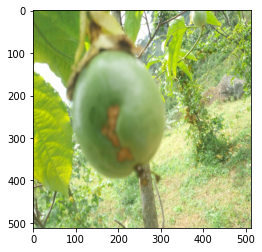

In [91]:
import matplotlib.image as img
import matplotlib.pyplot as plt

image = img.imread(train_toRotate_path)
plt.imshow(image)
 

In [92]:
xmin_toRot = df_train.loc[df_train['Image_ID'] == 'ID_007FAIEI']['xmin'].values[0]
ymin_toRot = df_train.loc[df_train['Image_ID'] == 'ID_007FAIEI']['ymin'].values[0]
xmax_toRot = df_train.loc[df_train['Image_ID'] == 'ID_007FAIEI']['xmax'].values[0]
ymax_toRot = df_train.loc[df_train['Image_ID'] == 'ID_007FAIEI']['ymax'].values[0]


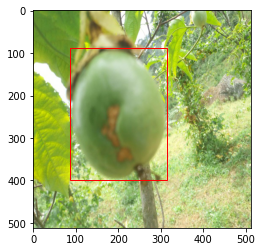

In [93]:
fig, ax = plt.subplots()
from matplotlib.patches import Rectangle
ax.imshow(image)
rect = Rectangle((xmin_toRot,ymin_toRot),xmax_toRot-xmin_toRot,ymax_toRot-ymin_toRot, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)
plt.show()

In [94]:
image = tf.io.read_file(train_toRotate_path)


In [95]:
image = tf.image.decode_jpeg(image)


In [96]:
# bounding_boxes = tf.constant([[xmin_toRot, ymin_toRot, xmax_toRot, ymax_toRot]])


In [97]:
bounding_boxes = tf.constant([[ymin_toRot,xmin_toRot,  ymax_toRot,xmax_toRot ]],dtype=tf.float32)


In [98]:
bounding_boxes

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[ 87.5,  87. , 398.5, 315. ]], dtype=float32)>

https://stackoverflow.com/questions/54255431/invalidargumenterror-cannot-compute-matmul-as-input-0zero-based-was-expected

In [99]:
def flipLR(bounding_boxes):
  bboxes = bounding_boxes * tf.constant([1, -1, 1, -1], dtype=tf.float32) + tf.stack([0.0, 1.0, 0.0, 1.0])
  bboxes = tf.stack([bboxes[:, 0], bboxes[:, 3], bboxes[:, 2], bboxes[:, 1]], axis=1)
  return bboxes

In [100]:

# # rotate every time
# image_rot, bounding_boxes_rot = random_rotate(
#     image, bounding_boxes, min_rotate=-180, max_rotate=180
# )
# rotate every time
image_rot, bb  = flip_left_right(
    image, bounding_boxes
)


In [101]:
bboxes = flipLR(bounding_boxes)

In [102]:
bboxes

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[  87.5, -314. ,  398.5,  -86. ]], dtype=float32)>

In [103]:
import numpy as np
rotatedBB = (np.array(bboxes))[0]
rotatedBB

array([  87.5, -314. ,  398.5,  -86. ], dtype=float32)

In [104]:
rotYmin = rotatedBB[0]
rotXmin = rotatedBB[1] + 512
rotYmax = rotatedBB[2]
rotXmax = rotatedBB[3] + 512
width = rotXmax - rotXmin
height = rotYmax - rotYmin

In [105]:
print(rotXmin,rotYmin,rotXmax,rotYmax)

198.0 87.5 426.0 398.5


https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image

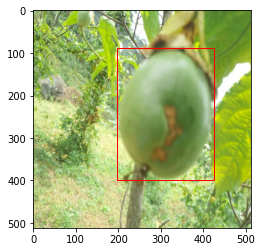

In [106]:
fig, ax = plt.subplots()
from matplotlib.patches import Rectangle
ax.imshow(image_rot)
rect = Rectangle((rotXmin,rotYmin),rotXmax-rotXmin,rotYmax-rotYmin, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)
plt.show()

# MID

Todo: rescale to 512 x 512